## Image Data : Cleaning, Organising, Representing

This notebook walks us through processing images and pre-processing it to both extract useful features and feed it into ML models. We will be using some of the datasets available via scikit-learn and pytorch. There are a lot of image datasets out there (http://www.image-net.org/), and images can be represented in many ways.


#### imports and data

Let us look at some very basic image datasets, starting with the digits MNIST dataset which contains handwritten digits which a machine learning model tries to recognize.

In [1]:
import sklearn

In [8]:
import numpy as np

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt 

In [3]:
digits = datasets.load_digits()

In [4]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
digits.target[0]

0

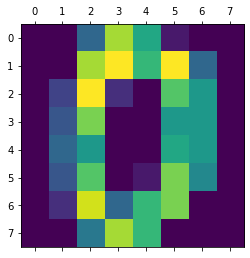

In [6]:
plt.matshow(digits.images[0]) 

So right here we see (albeit with a very low resolution), how image objects are stored: as an array, as a target label, and a visualisation, all for the number 0 in the images dataset. 

Usually, images we deal with in the real world and with modern day deep learning have a lot more information, but they tend to follow similar representations.

#### Images as colors in space

What we just saw was a very basic way of representing an image, with a location and a value for the color. The matrix representation which we see there has only one channel to describe color. Normally, for computers, we use three channels: red, green and blue, and often images are in RGB format. This means all images can be thought of as a matrix where we have a pixel location and its color information, which can have different attributes.

We'll now see some images in rgb (and other) formats with scikit-image.

#### scikit-image

https://scikit-image.org/

Scikit-image is a popular image processing dataset which is often used for a lot of standad image related tasks as well as machine learning tasks. Let's quickly look at the kinds of things we can do with it.

In [2]:
from skimage.io import imshow, imsave, imread
from skimage import data

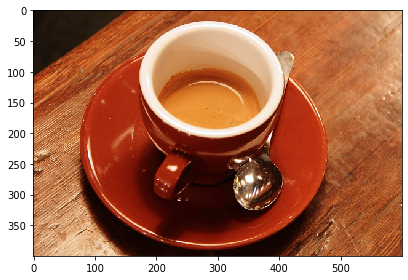

In [3]:
image = data.coffee()
imshow(image)

In [9]:
image.shape

(400, 600, 3)

In [10]:
image[0]

array([[ 21,  13,   8],
       [ 21,  13,   9],
       [ 20,  11,   8],
       ...,
       [228, 182, 138],
       [231, 185, 142],
       [228, 184, 140]], dtype=uint8)

In [11]:
from skimage.transform import rotate

In [12]:
image_90 = rotate(image, angle=90)

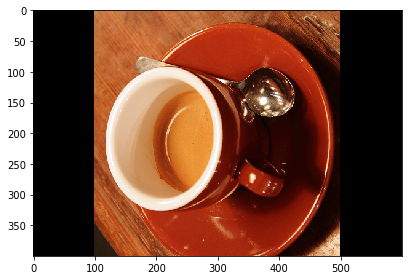

In [13]:
imshow(image_90)

In [14]:
from skimage.transform import rescale

In [15]:
image_rescaled = rescale(image, 0.25, anti_aliasing=False)

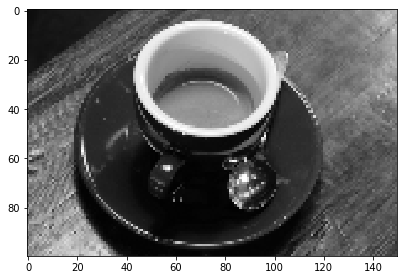

In [16]:
imshow(image_rescaled)

In [17]:
imsave("coffee.png", image)

This was some basic playing around... scikit image offers us a lot more as well. 

For a full list of examples: https://scikit-image.org/docs/stable/auto_examples/index.html

Another popular image processing library in python is Pillow: https://pillow.readthedocs.io/en/stable/

#### Alternate representations of Images

So now we've seen how images are represented with RGB as the format. This isn't the only way to represent images though: HSV is another popular format for representing images, and for a representation which is more in line with how humans perceive color, the JzAzBz representation has proved effective.

In [18]:
from skimage.color import rgb2hsv

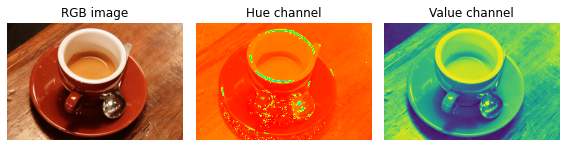

In [19]:
# code adapted from the scikit-image documentation: 
# https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_hsv.html

hsv_img = rgb2hsv(image)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))

ax0.imshow(image)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()

In [20]:
hsv_img

array([[[0.06410256, 0.61904762, 0.08235294],
        [0.05555556, 0.57142857, 0.08235294],
        [0.04166667, 0.6       , 0.07843137],
        ...,
        [0.08148148, 0.39473684, 0.89411765],
        [0.08052434, 0.38528139, 0.90588235],
        [0.08333333, 0.38596491, 0.89411765]],

       [[0.07142857, 0.66666667, 0.08235294],
        [0.05555556, 0.57142857, 0.08235294],
        [0.08974359, 0.65      , 0.07843137],
        ...,
        [0.08333333, 0.40350877, 0.89411765],
        [0.08333333, 0.3982684 , 0.90588235],
        [0.08333333, 0.40174672, 0.89803922]],

       [[0.08333333, 0.66666667, 0.08235294],
        [0.03846154, 0.56521739, 0.09019608],
        [0.07575758, 0.55      , 0.07843137],
        ...,
        [0.08333333, 0.40350877, 0.89411765],
        [0.08608059, 0.39912281, 0.89411765],
        [0.08608059, 0.39737991, 0.89803922]],

       ...,

       [[0.06994048, 0.59259259, 0.74117647],
        [0.07301587, 0.49065421, 0.83921569],
        [0.07044674, 0

We will now use the [comp-syn](https://github.com/comp-syn/comp-syn/) package which creates word - color embeddings for their JzAzBz functionality.

In [5]:
from compsyn.datahelper import rgb_array_to_jzazbz_array

In [6]:
jzazbz_image = rgb_array_to_jzazbz_array(image)

In [23]:
jzazbz_image

array([[[0.01127007, 0.00407485, 0.00660406],
        [0.01133101, 0.0041947 , 0.0057689 ],
        [0.01046174, 0.00483906, 0.00530166],
        ...,
        [0.12830229, 0.01663288, 0.04327499],
        [0.13023576, 0.01664737, 0.04233502],
        [0.12908856, 0.0156342 , 0.04262487]],

       [[0.01120888, 0.00394474, 0.00746844],
        [0.01133101, 0.0041947 , 0.0057689 ],
        [0.01129628, 0.00262845, 0.00763482],
        ...,
        [0.12819012, 0.01638742, 0.0446668 ],
        [0.13006587, 0.01628265, 0.04441847],
        [0.12881571, 0.01635235, 0.04458392]],

       [[0.01151412, 0.00323853, 0.00795241],
        [0.01184759, 0.00554325, 0.00565606],
        [0.01141756, 0.00288751, 0.00594444],
        ...,
        [0.12819012, 0.01638742, 0.0446668 ],
        [0.12891954, 0.01526579, 0.04470997],
        [0.12954505, 0.01523332, 0.04462755]],

       ...,

       [[0.09642082, 0.02849753, 0.05525978],
        [0.11442146, 0.02376162, 0.05029509],
        [0.1050618 , 0

So images are matrices with pixel location and color (or perceptual) information. And we can play around this by rotating, cropping, resizing and more. 

In [24]:
image.shape

(400, 600, 3)

In [25]:
hsv_img.shape

(400, 600, 3)

In [26]:
jzazbz_image.shape

(400, 600, 3)

### Binning Images

To convert the full color distribution to a representation distribution, it is possible to "bin" the images in a way where we compress the images to a far denser vector.

In [1]:
def binning_image(image, 
        spacing=36,
        num_bins=8,
        num_channels=3,
        Jz_min=0.0,
        Jz_max=0.167,
        Az_min=-0.1,
        Az_max=0.11,
        Bz_min=-0.156,
        Bz_max=0.115,
        h_max=360,
        rgb_max=255,
        dims=(300, 300)):
    
    dist = np.ravel(
                        np.histogramdd(
                            np.reshape(
                                image[:, :, :], (dims[0] * dims[1], num_channels)
                            ),
                            bins=(
                                np.linspace(
                                    Jz_min,
                                    Jz_max,
                                    1 + int(num_bins ** (1.0 / num_channels)),
                                ),
                                np.linspace(
                                    Az_min,
                                    Az_max,
                                    1 + int(num_bins ** (1.0 / num_channels)),
                                ),
                                np.linspace(
                                    Bz_min,
                                    Bz_max,
                                    1 + int(num_bins ** (1.0 / num_channels)),
                                ),
                            ),
                            density=True,
                        )[0]
                    )
    return dist

In [15]:
binned_jzazbz = binning_image(jzazbz_image, dims=(400, 600))

In [16]:
binned_jzazbz

array([3.50737932e-03, 9.76454401e+00, 3.50737932e-03, 4.66979497e+02,
       2.10442759e-02, 2.43412124e+01, 4.91033104e-02, 3.40591083e+02])

## Images for Deep Learning

When we are using images for deep learning, there are a few standard pre-processing steps which must be done to images. When we are working with pre-trained models, we must be sure that our pre-processing matches how the images were pre-processed for the original training model. 

Let us load a few sample datasets from pytorch and see what kind of options we have. For vision related tasks, we use torchvision: https://pytorch.org/docs/stable/torchvision/index.html

In [27]:
import torch 
import torchvision
import torch.nn as nn

Each of the image pre-processing tasks on images are referred to as transformations. Some standard transformations are resizing, rescaling, and normalising the image with respect to the mean and standard deviation asssociated with the model. In Pytorch we use the transformer class to do these tasks, and can stack them up with the compose function.

https://pytorch.org/docs/stable/torchvision/transforms.html

Below is an example of some transformations which are often applied to images - here, this is part of a series of pre-processing for getting an image compatible with resnet-18, a popular Convolutional Neural Network used to train images.

In [28]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

Torchvision interfaces with PIL (pillow) which we mentioned before. Let us open images using it.

In [29]:
from PIL import Image


In [30]:
image = Image.open('coffee.png')

In [31]:
transformed_image = transforms(image)

In [32]:
transformed_image.shape

torch.Size([3, 224, 224])

Let's peak at what the image looks like after pre-processing.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


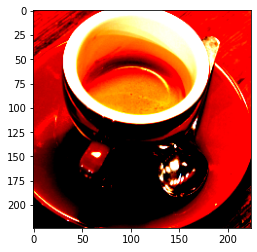

In [33]:
# the permute function to put the channels as the last dimensions
plt.imshow(transformed_image.permute(1, 2, 0))

These transformations are applied on each of the images for training and testing. For deep learning we don't often do a lot of pre-processing outside of resizing/rescaling and normalising the image. 

### Vector Representations and Image Embeddings

So far these we saw how computers store images and represent them. How do neural networks interpret images after being fed an image? Finding this out basically involves passing an image through a deep neural model. Luckily for us with pre-trained models, we can do this really quickly. Here, we use the final pre-trained layer which is the avgpool layer. We use different layers depending on the kind of model.

In [34]:
import torchvision.models as models


In [35]:
# Load the pretrained model
model = models.resnet18(pretrained=True)

# Use the model object to select the desired layer
layer = model._modules.get('avgpool')

# Set model to evaluation mode
d = model.eval()

In [36]:
def get_vector(image):
    # code adapted from the package:
    # https://github.com/christiansafka/img2vec/
    # Create a PyTorch tensor with the transformed image
    t_img = transforms(image)
    # Create a vector of zeros that will hold our feature vector
    # The 'avgpool' layer has an output size of 512
    my_embedding = torch.zeros(512)

    # Define a function that will copy the output of a layer
    def copy_data(m, i, o):
        my_embedding.copy_(o.flatten())                 # <-- flatten

    # Attach that function to our selected layer
    h = layer.register_forward_hook(copy_data)
    # Run the model on our transformed image
    with torch.no_grad():                               # <-- no_grad context
        model(t_img.unsqueeze(0))                       # <-- unsqueeze
    # Detach our copy function from the layer
    h.remove()
    # Return the feature vector
    return my_embedding

In [37]:
get_vector(image)

tensor([5.2114e-01, 6.5401e-01, 7.8711e-01, 6.6875e-01, 5.4115e-01, 3.7802e-01,
        1.1054e+00, 1.6093e+00, 2.6552e-01, 5.7210e-01, 2.2767e+00, 4.4873e-01,
        2.2637e+00, 3.2761e+00, 3.2214e+00, 3.2748e-01, 1.8859e+00, 2.5248e-01,
        8.6163e-01, 2.1344e-01, 3.7674e-01, 5.2334e-01, 1.3600e-01, 4.0304e-01,
        1.2428e-01, 4.0099e-02, 2.5791e+00, 1.3981e+00, 2.9638e+00, 1.1057e-01,
        8.2059e-01, 1.0223e-01, 1.0537e-01, 2.8677e-02, 9.2865e-01, 3.3943e-01,
        1.6272e-02, 2.1651e+00, 7.4947e-02, 1.7024e+00, 3.1514e-01, 1.2285e+00,
        6.3144e-01, 4.7805e-01, 1.6355e-01, 1.6328e+00, 7.0304e-01, 1.5598e+00,
        0.0000e+00, 9.9328e-01, 4.1731e-01, 4.4468e-01, 6.5173e-01, 2.8210e-01,
        6.1957e-02, 3.5009e+00, 6.9768e-01, 6.5838e-01, 8.7600e-01, 4.3350e-01,
        9.6130e-01, 7.4099e-01, 9.6379e-01, 3.0546e+00, 2.1678e-03, 6.4732e-01,
        5.0525e-01, 2.0349e+00, 2.8286e-01, 1.8410e-01, 1.5675e+00, 2.0140e-01,
        3.2531e+00, 5.6871e-01, 1.7803e+

Neat! So we just passed our transformed coffee image to the pre-trained resnet model and got a 512 dimensional image vector as the result. resent uses this vector to classify it. We can expect this image embedding to contain information of what are the coffee like characteristics of an image. 

The same code is wrapped up in the package img2vec_pytorch, and so far features a quick vector creation pipeline for resnet and AlexNet.

In [38]:
from img2vec_pytorch import Img2Vec


In [39]:
img2vec = Img2Vec()

/Users/bhargavvader/open_source/thinking-with-deep-learning/venv/lib/python3.7/site-packages/torchvision/transforms/transforms.py:279: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [40]:
coffee_vec = img2vec.get_vec(image)

In [41]:
coffee_vec

array([2.25797206e-01, 2.81964779e-01, 4.98293132e-01, 6.94463015e-01,
       4.40986425e-01, 4.68564898e-01, 1.37138379e+00, 6.28250957e-01,
       3.25331479e-01, 4.40027677e-02, 2.58244085e+00, 8.19615602e-01,
       2.54137397e+00, 2.57595539e+00, 3.83238435e+00, 1.38657495e-01,
       2.97213197e-01, 1.29888451e+00, 2.88481146e-01, 7.08386973e-02,
       2.87005007e-01, 4.79841739e-01, 1.48024922e-02, 3.16166073e-01,
       8.72732550e-02, 1.39363527e-01, 3.53840661e+00, 5.03714025e-01,
       4.30884361e+00, 0.00000000e+00, 4.83361453e-01, 5.93673468e-01,
       4.40400481e-01, 1.37258410e-01, 1.12684894e+00, 6.74996614e-01,
       0.00000000e+00, 1.57064974e+00, 1.34779140e-02, 1.43884492e+00,
       2.78478324e-01, 1.73063087e+00, 8.70220602e-01, 8.43109846e-01,
       2.13631958e-01, 2.55658579e+00, 3.00220460e-01, 1.60575902e+00,
       8.52546766e-02, 1.10646105e+00, 1.66480139e-01, 1.09477139e+00,
       6.48421526e-01, 5.55999339e-01, 1.07370980e-01, 2.64314556e+00,
      

In [42]:
cat_image = Image.open("cat.png")

In [43]:
dog_image = Image.open("dog.png")

These vectors are useful because we can then do basic similarity checks using them.

In [44]:
cat_vec = img2vec.get_vec(cat_image.convert('RGB'), tensor=True)

In [45]:
dog_vec = img2vec.get_vec(dog_image.convert('RGB'), tensor=True)

In [46]:
coffee_vec = img2vec.get_vec(image, tensor=True)

In [47]:
cos = nn.CosineSimilarity(dim=1, eps=1e-6)

In [48]:
cos_sim = cos(cat_vec,
              dog_vec)


In [49]:
cos_sim

tensor([[[0.6376]]])

In [50]:
cos_sim = cos(coffee_vec,
              dog_vec)


In [51]:
cos_sim

tensor([[[0.4965]]])

The dog and cat are closer to each other than the dog and coffee - which makes sense!

We've seen a bunch of ways to play around and represent images, and how deep learning ties into this. In the chapter on images for deep learning we'll see this in a lot more detail!